# Rock Paper scissors coursework

## Library Importation 

In [1]:
import pandas as pd 
import numpy as np 
import cv2
import matplotlib.pyplot as plt
import random
import PIL
import pathlib

In [2]:
from tensorflow.keras.layers import Input,  Dense, Flatten, Dropout,Conv2D, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras.callbacks import ModelCheckpoint
from glob import glob
from tensorflow.keras.optimizers import Adam

## Dataset Loading 

In [3]:
test_data_loaded = pathlib.Path("C:/Users/UZOWURU/Desktop/Spring/CT7160 Computer Vision/coursew work 2/Rock-Paper-Scissors/test").with_suffix('')
train_data_loaded = pathlib.Path("C:/Users/UZOWURU/Desktop/Spring/CT7160 Computer Vision/coursew work 2/Rock-Paper-Scissors/train").with_suffix('')
validation_data_loaded = pathlib.Path("C:/Users/UZOWURU/Desktop/Spring/CT7160 Computer Vision/coursew work 2/Rock-Paper-Scissors/validation").with_suffix('')

In [4]:
img_count1 = len(list(train_data_loaded.glob('*/*.png')))
print(img_count1)
img_count3 = len(list(test_data_loaded.glob('*/*.png')))
print(img_count3)
img_count2 = len(list(validation_data_loaded.glob('*/*.png')))
print(img_count2)

2520
372
33


## Dataset Visualization 

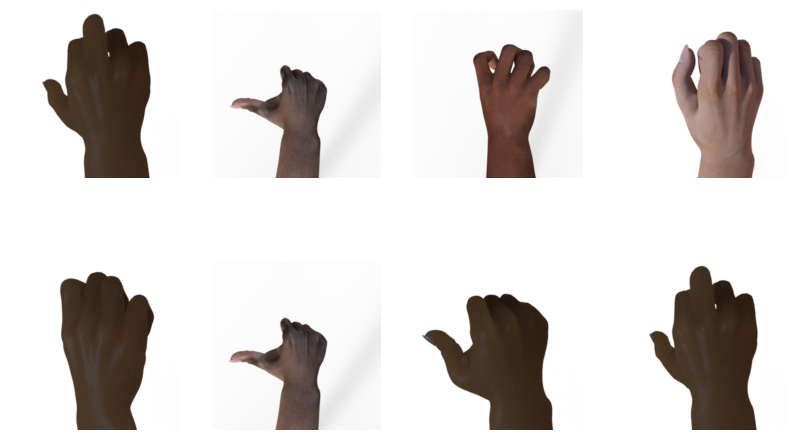

In [5]:
rock = list(train_data_loaded.glob('rock/*'))
fig, ax = plt.subplots(2, 4, figsize=(10, 6))

for i in range(2):
    for j in range(4):
        img_path = str(random.choice(rock))
        img = PIL.Image.open(img_path)
        ax[i][j].imshow(img, cmap='gray')
        ax[i][j].axis('off')
plt.show()

## Data Pre-preccesing and Augumentation 

In [6]:
image_generator = ImageDataGenerator(rescale=1 / 255.0,
        rotation_range=20,
        zoom_range=0.05,
        width_shift_range=0.05,
        height_shift_range=0.05,
        shear_range=0.05,
        horizontal_flip=True)
train_dataset = image_generator.flow_from_directory(
                                                    directory=train_data_loaded,
                                                    classes=('rock','paper','scissors'),
                                                    class_mode='categorical',
                                                    color_mode='grayscale',
                                                    target_size=(300, 300),
                                                    shuffle=True,
                                                    seed=123,
                                                    batch_size=32)

test_dataset = image_generator.flow_from_directory(
                                                    directory=test_data_loaded,
                                                    classes=('rock','paper','scissors'),
                                                    class_mode='categorical',
                                                    color_mode='grayscale',
                                                    target_size=(300, 300),
                                                    shuffle=True,
                                                    seed=123,
                                                    batch_size=32)
validation_dataset = image_generator.flow_from_directory(
                                                    directory=validation_data_loaded,
                                                    classes=('rock','paper','scissors'),
                                                    class_mode='categorical',
                                                    color_mode='grayscale',
                                                    target_size=(300, 300),
                                                    shuffle=True,
                                                    seed=123,
                                                    batch_size=32)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.
Found 33 images belonging to 3 classes.


## Dataset Visualization with Labels 

C:\Users\UZOWURU\.conda\envs\opencv\lib\site-packages\matplotlib\text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


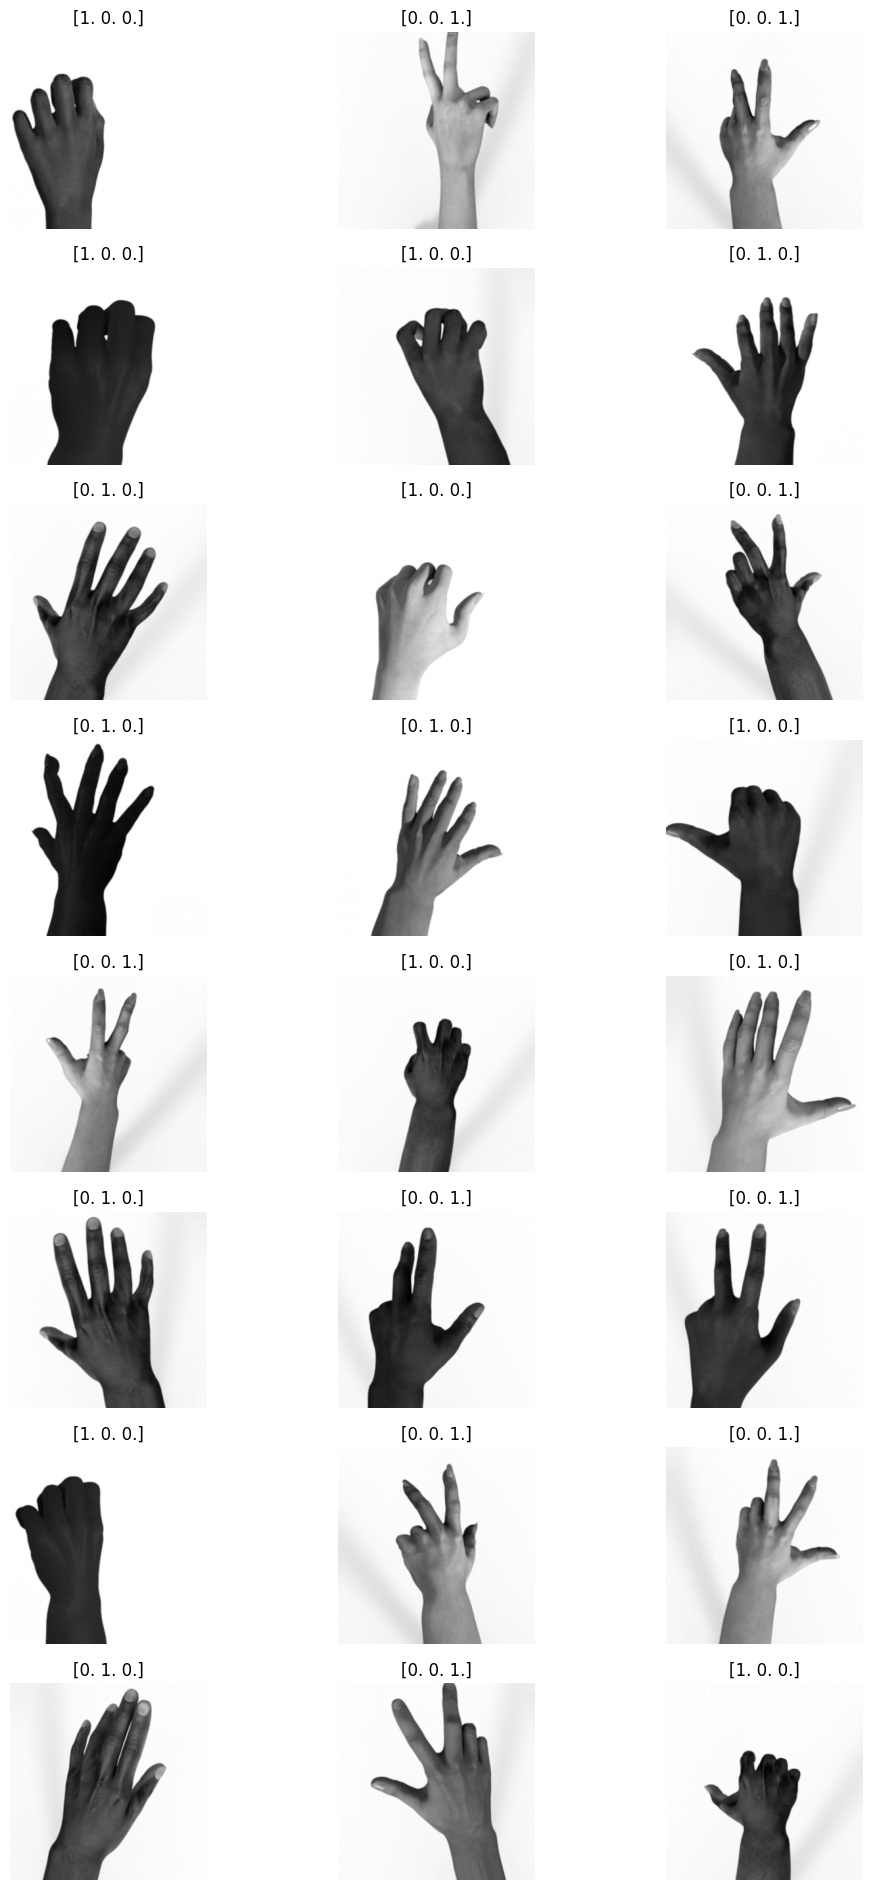

In [7]:

batch_1_img = train_dataset[0]
fig, axes = plt.subplots(nrows=8, ncols=3, figsize=(12, 24))
for i, ax in enumerate(axes.flat):
    img = batch_1_img[0][i]
    lab = batch_1_img[1][i]
    ax.imshow(img, cmap='gray')
    ax.set_title(lab)
    ax.axis('off')
plt.show()

## Convolutional Neural Net Model(1)

In [8]:
model1 = keras.Sequential([
  keras.layers.Flatten(),
  keras.layers.Dense(512, activation='relu'),
  keras.layers.Dense(256, activation='relu'),
  keras.layers.Dense(3, activation='softmax')
])

model1.compile(optimizer='adam',
              loss=keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

model1.fit(train_dataset,validation_data=test_dataset,epochs=5, batch_size=32)

loss, accuracy = model1.evaluate(validation_dataset)
print("Loss:", loss)
print("Accuracy:", accuracy)

Epoch 1/5
79/79 [==============================] - 67s 829ms/step - loss: 21.0628 - accuracy: 0.3881 - val_loss: 6.0120 - val_accuracy: 0.3280
Epoch 2/5
79/79 [==============================] - 60s 754ms/step - loss: 2.6457 - accuracy: 0.4948 - val_loss: 1.6033 - val_accuracy: 0.4785
Epoch 3/5
79/79 [==============================] - 64s 810ms/step - loss: 1.3366 - accuracy: 0.5829 - val_loss: 1.7041 - val_accuracy: 0.3710
Epoch 4/5
79/79 [==============================] - 65s 818ms/step - loss: 1.4093 - accuracy: 0.6044 - val_loss: 2.7914 - val_accuracy: 0.3253
Epoch 5/5
2/2 [==============================] - 0s 28ms/step - loss: 1.0518 - accuracy: 0.6061
Loss: 1.0518420934677124
Accuracy: 0.6060606241226196


## Convolutional Neural Net Model(2)

In [9]:
model2 = keras.Sequential([
   keras.layers.Conv2D(64, 3, activation='relu', input_shape=(300,300,1)),
   keras.layers.Conv2D(32, 3, activation='relu'),
   keras.layers.Flatten(),
   keras.layers.Dense(3, activation='softmax')
])

model2.compile(optimizer='adam',
              loss=keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

model2.fit(train_dataset,validation_data=test_dataset,epochs=5, batch_size=32)

loss, accuracy = model2.evaluate(validation_dataset)
print("Loss:", loss)
print("Accuracy:", accuracy)

Epoch 1/5
79/79 [==============================] - 479s 6s/step - loss: 7.2755 - accuracy: 0.5853 - val_loss: 0.9912 - val_accuracy: 0.5242
Epoch 2/5
79/79 [==============================] - 487s 6s/step - loss: 0.6846 - accuracy: 0.7492 - val_loss: 1.0031 - val_accuracy: 0.5349
Epoch 3/5
79/79 [==============================] - 498s 6s/step - loss: 0.7660 - accuracy: 0.6730 - val_loss: 1.0689 - val_accuracy: 0.4032
Epoch 4/5
79/79 [==============================] - 513s 6s/step - loss: 0.6323 - accuracy: 0.7365 - val_loss: 0.9395 - val_accuracy: 0.5941
Epoch 5/5
2/2 [==============================] - 2s 60ms/step - loss: 2.0934 - accuracy: 0.5758
Loss: 2.093440294265747
Accuracy: 0.5757575631141663


## Convolutional Neural Net Model(Final)

In [10]:

model3 = keras.models.Sequential([
keras.layers.Conv2D(64, (3,3), activation='relu', input_shape = [300, 300,1]),
keras.layers.MaxPooling2D(),
keras.layers.Conv2D(32, (3,3), activation='relu'),
keras.layers.MaxPooling2D(),
keras.layers.Conv2D(32, (3,3), activation='relu'),
keras.layers.MaxPooling2D(),
keras.layers.Dropout(0.5),
keras.layers.Flatten(),
keras.layers.Dense(64, activation='relu'),
keras.layers.Dense(3, activation ='softmax')])

## hyperparemeter tuning 

In [11]:
model3.compile(loss=keras.losses.CategoricalCrossentropy(), optimizer='adam', metrics = ['accuracy'])

callback = keras.callbacks.EarlyStopping(monitor='val_loss',
                                        patience=3,
                                        restore_best_weights=True)
call = ModelCheckpoint("model.hdf5", monitor='val_accuracy',save_best_only=True)

## Model Summary 

In [12]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 298, 298, 64)      640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 64)     0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 147, 147, 32)      18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 71, 71, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 32)      

In [13]:
History1=model3.fit(train_dataset, epochs=30, batch_size=32,validation_data=test_dataset,callbacks=[callback,call])

Epoch 1/30
79/79 [==============================] - 272s 3s/step - loss: 0.9891 - accuracy: 0.4853 - val_loss: 0.7004 - val_accuracy: 0.7016
Epoch 2/30
79/79 [==============================] - 274s 3s/step - loss: 0.4521 - accuracy: 0.8139 - val_loss: 0.4236 - val_accuracy: 0.8333
Epoch 3/30
79/79 [==============================] - 242s 3s/step - loss: 0.2269 - accuracy: 0.9254 - val_loss: 0.4840 - val_accuracy: 0.7930
Epoch 4/30
79/79 [==============================] - 248s 3s/step - loss: 0.1562 - accuracy: 0.9492 - val_loss: 0.5158 - val_accuracy: 0.8253
Epoch 5/30
79/79 [==============================] - 263s 3s/step - loss: 0.1299 - accuracy: 0.9552 - val_loss: 0.3183 - val_accuracy: 0.8871
Epoch 6/30
79/79 [==============================] - 260s 3s/step - loss: 0.1097 - accuracy: 0.9619 - val_loss: 0.2419 - val_accuracy: 0.8898
Epoch 7/30
79/79 [==============================] - 262s 3s/step - loss: 0.0984 - accuracy: 0.9683 - val_loss: 0.2879 - val_accuracy: 0.8871
Epoch 8/30
79

## Model Performance Plot 

In [14]:
History1.epoch

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [17]:
print (len(History1.epoch))

12


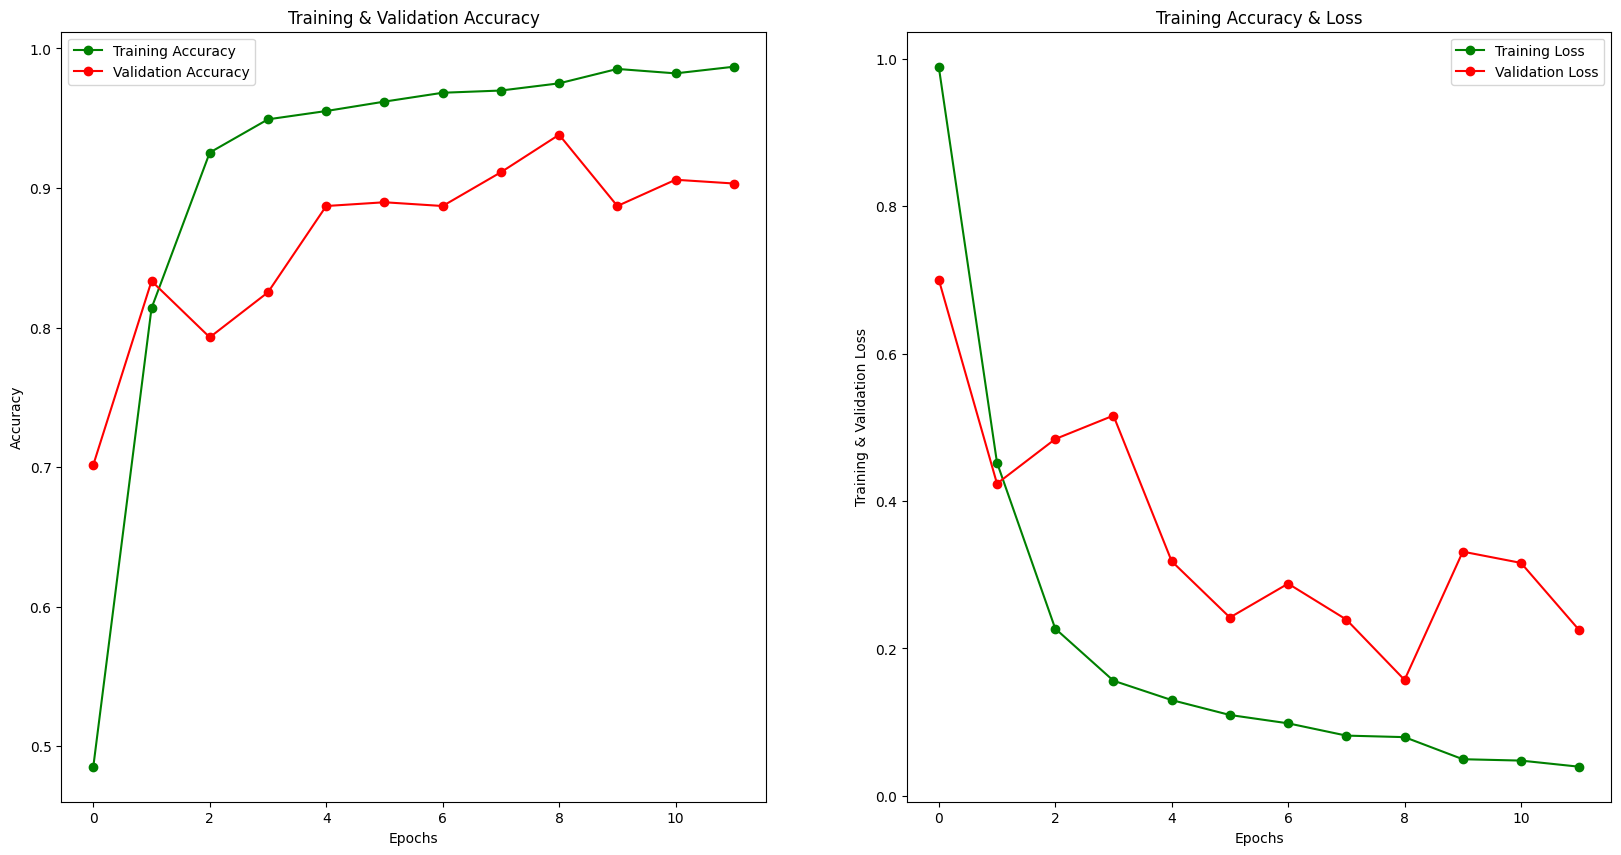

In [18]:
epochs = [i for i in range(len(History1.epoch))]
fig , ax = plt.subplots(1,2)
train_acc = History1.history['accuracy']
train_loss = History1.history['loss']
val_acc = History1.history['val_accuracy']
val_loss = History1.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Training Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

## Model Evaluation 

In [19]:
loss, accuracy = model3.evaluate(validation_dataset)
print("Loss:", loss)
print("Accuracy:", accuracy)

2/2 [==============================] - 1s 42ms/step - loss: 0.3318 - accuracy: 0.9091
Loss: 0.3318401277065277
Accuracy: 0.9090909361839294


In [20]:
predictions = model3.predict(test_dataset)[:32]

12/12 [==============================] - 9s 733ms/step


In [21]:
pred_score = np.around(predictions,3)
pred_label = np.argmax(predictions, axis=1)

In [22]:
pred_score = np.around(predictions,3)

In [23]:
def show_prection_result(img_data,label_data):
    for img,actual_label,label,score in zip(img_data,label_data,pred_label,pred_score):
        plt.imshow(img, cmap='gray')
        max_val = round(np.max(score),2)
        plt.title(f'Predicted Score: {max_val}, Predicted Label: {label}, Actual Label: {actual_label}')
        plt.axis('off')
    plt.show()

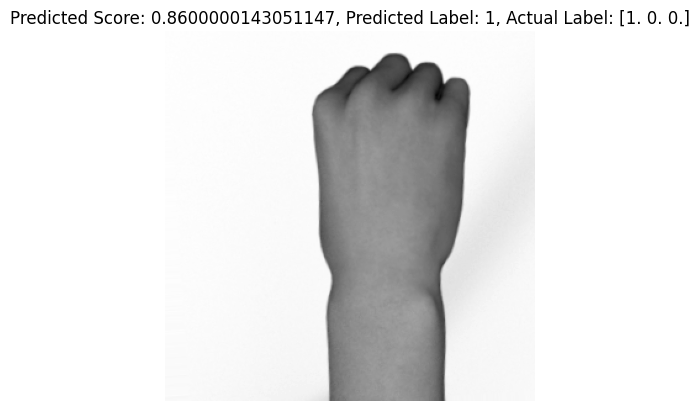

In [24]:
show_prection_result(test_dataset[0][0],test_dataset[0][1])

## model loading 

In [25]:
filename = 'model.hdf5'
from keras.models import load_model
Model = load_model('model.hdf5')

## Game Function 

In [26]:
def game(img1, img2, model):

    img1 = img1.reshape((1, 300, 300, 1))
    img2 = img2.reshape((1, 300, 300, 1))
    pred1 = np.argmax(model.predict(img1), axis=1)[0]
    pred2 = np.argmax(model.predict(img2), axis=1)[0]
    winning_moves = {0: 2, 1: 0, 2: 1, 3: 1, 4: 2, 5: 0, 6: 0, 7: 1, 8: 2}
    
    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].imshow(img1.squeeze(), cmap='gray')
    ax[0].set_title(f'First Player: {["Rock", "Paper", "Scissors"][pred1]}')
    ax[1].imshow(img2.squeeze(), cmap='gray')
    ax[1].set_title(f'Second Player: {["Rock", "Paper", "Scissors"][pred2]}')
    plt.show()
  
    if pred1 == pred2:
        return "It's a tie!"
    elif winning_moves[pred1] == pred2:
        return "First Player wins!"
    else:
        return "Second Player!"

In [27]:
## Testing and implementation of game 

1/1 [==============================] - 0s 48ms/step


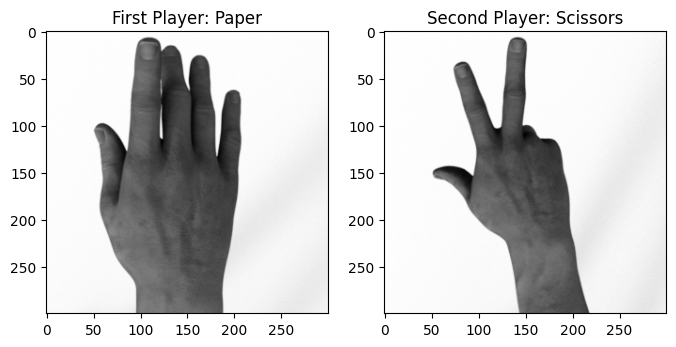

Result:  Second Player!


In [28]:
model = Model
img1 = cv2.imread('Rock-Paper-Scissors\game images\img1.png', 0)
img2 = cv2.imread('Rock-Paper-Scissors\game images\img2.png', 0)

result = game(img1, img2, model)
print('Result: ', result)